## SEC Baseball Data Analysis

### By Harper Kates

## Section 1: Import Libraries

In [388]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics
from ipywidgets import interact, IntSlider
import ipywidgets as widgets

## Section 2: Import Data

In [389]:
df_batting = pd.read_csv("data/2024 SEC Batting.csv", index_col = None, header = 0)
df_pitching = pd.read_csv("data/2024 SEC Pitching.csv", index_col = None, header = 0)

## Section 3: Clean Data

In [390]:
pd.set_option('display.max_columns', None)
df_batting.head()

,Player,avg,gp-gs,ab,r,h,2b,3b,hr,rbi,tb,slg%,bb,hbp,so,gdp,ob%,sf,sh,sb-att
0,"Christian Moore, UT",0.375,72-72,296,83,111,19,2,34,74,236,0.797,38,3,49,5,0.451,0,0,5-9
1,"Blake Burke, UT",0.379,72-72,285,74,108,30,1,20,61,200,0.702,35,2,48,3,0.449,1,0,11-13
2,"Gavin Grahovac, AM",0.298,67-67,285,83,85,16,0,23,66,170,0.596,36,7,95,3,0.390,0,0,4-5
3,"Tommy White, LS",0.330,66-66,279,61,92,12,1,24,70,178,0.638,27,7,38,10,0.401,1,0,3-3
4,"Slate Alford, UG",0.300,60-60,267,55,80,13,0,17,69,144,0.539,26,5,63,8,0.370,2,0,1-1


In [391]:
df_batting[['Player', 'Team']] = df_batting['Player'].str.split(', ', expand=True)
df_batting.head()

,Player,avg,gp-gs,ab,r,h,2b,3b,hr,rbi,tb,slg%,bb,hbp,so,gdp,ob%,sf,sh,sb-att,Team
0,Christian Moore,0.375,72-72,296,83,111,19,2,34,74,236,0.797,38,3,49,5,0.451,0,0,5-9,UT
1,Blake Burke,0.379,72-72,285,74,108,30,1,20,61,200,0.702,35,2,48,3,0.449,1,0,11-13,UT
2,Gavin Grahovac,0.298,67-67,285,83,85,16,0,23,66,170,0.596,36,7,95,3,0.390,0,0,4-5,AM
3,Tommy White,0.330,66-66,279,61,92,12,1,24,70,178,0.638,27,7,38,10,0.401,1,0,3-3,LS
4,Slate Alford,0.300,60-60,267,55,80,13,0,17,69,144,0.539,26,5,63,8,0.370,2,0,1-1,UG


In [392]:
df_batting[['gp', 'gs']] = df_batting['gp-gs'].str.split('-', expand=True)
df_batting = df_batting.drop(columns=['gp-gs'])
df_batting["gp"] = df_batting["gp"].astype(int)
df_batting["gs"] = df_batting["gs"].astype(int)
df_batting[['sb', 'sba']] = df_batting['sb-att'].str.split('-', expand=True)
df_batting = df_batting.drop(columns=['sb-att'])
df_batting["sb"] = df_batting["sb"].astype(int)
df_batting["sba"] = df_batting["sba"].astype(int)
df_batting.head()

,Player,avg,ab,r,h,2b,3b,hr,rbi,tb,slg%,bb,hbp,so,gdp,ob%,sf,sh,Team,gp,gs,sb,sba
0,Christian Moore,0.375,296,83,111,19,2,34,74,236,0.797,38,3,49,5,0.451,0,0,UT,72,72,5,9
1,Blake Burke,0.379,285,74,108,30,1,20,61,200,0.702,35,2,48,3,0.449,1,0,UT,72,72,11,13
2,Gavin Grahovac,0.298,285,83,85,16,0,23,66,170,0.596,36,7,95,3,0.390,0,0,AM,67,67,4,5
3,Tommy White,0.330,279,61,92,12,1,24,70,178,0.638,27,7,38,10,0.401,1,0,LS,66,66,3,3
4,Slate Alford,0.300,267,55,80,13,0,17,69,144,0.539,26,5,63,8,0.370,2,0,UG,60,60,1,1


In [393]:
df_pitching[['Player', 'Team']] = df_pitching['Player'].str.split(', ', expand=True)
df_pitching.head()

,Player,era,w-l,app-gs,cg,sho,sv,ip,h,r,er,bb,so,2b,3b,hr,ab,b/avg,wp,hbp,bk,Team
0,Drew Beam,4.22,9-2,19-19,2,0/0,0,102.1,103,58,48,27,99,16,1,15,398,0.259,3,8,0,UT
1,Ryan Prager,2.95,9-1,19-19,1,1/4,0,97.2,83,36,32,20,124,12,0,12,367,0.226,1,5,0,AM
2,Khal Stephen,3.28,8-3,16-16,0,0/1,0,96.0,76,37,35,21,107,10,0,13,356,0.213,6,6,0,MS
3,Mason Moore,5.05,9-4,18-18,0,0/1,0,92.2,79,57,52,54,83,15,1,9,335,0.236,4,13,1,UK
4,Luke Holman,2.75,9-4,16-16,0,0/3,0,91.2,57,36,28,33,127,12,1,6,327,0.174,8,12,1,LS


In [394]:
df_pitching[['w', 'l']] = df_pitching['w-l'].str.split('-', expand=True)
df_pitching = df_pitching.drop(columns=['w-l'])
df_pitching["w"] = df_pitching["w"].astype(int)
df_pitching["l"] = df_pitching["l"].astype(int)
df_pitching.head()

,Player,era,app-gs,cg,sho,sv,ip,h,r,er,bb,so,2b,3b,hr,ab,b/avg,wp,hbp,bk,Team,w,l
0,Drew Beam,4.22,19-19,2,0/0,0,102.1,103,58,48,27,99,16,1,15,398,0.259,3,8,0,UT,9,2
1,Ryan Prager,2.95,19-19,1,1/4,0,97.2,83,36,32,20,124,12,0,12,367,0.226,1,5,0,AM,9,1
2,Khal Stephen,3.28,16-16,0,0/1,0,96.0,76,37,35,21,107,10,0,13,356,0.213,6,6,0,MS,8,3
3,Mason Moore,5.05,18-18,0,0/1,0,92.2,79,57,52,54,83,15,1,9,335,0.236,4,13,1,UK,9,4
4,Luke Holman,2.75,16-16,0,0/3,0,91.2,57,36,28,33,127,12,1,6,327,0.174,8,12,1,LS,9,4


In [395]:
df_pitching[['app', 'gs']] = df_pitching['app-gs'].str.split('-', expand=True)
df_pitching = df_pitching.drop(columns=['app-gs'])
df_pitching["app"] = df_pitching["app"].astype(int)
df_pitching["gs"] = df_pitching["gs"].astype(int)
df_pitching.head()

,Player,era,cg,sho,sv,ip,h,r,er,bb,so,2b,3b,hr,ab,b/avg,wp,hbp,bk,Team,w,l,app,gs
0,Drew Beam,4.22,2,0/0,0,102.1,103,58,48,27,99,16,1,15,398,0.259,3,8,0,UT,9,2,19,19
1,Ryan Prager,2.95,1,1/4,0,97.2,83,36,32,20,124,12,0,12,367,0.226,1,5,0,AM,9,1,19,19
2,Khal Stephen,3.28,0,0/1,0,96.0,76,37,35,21,107,10,0,13,356,0.213,6,6,0,MS,8,3,16,16
3,Mason Moore,5.05,0,0/1,0,92.2,79,57,52,54,83,15,1,9,335,0.236,4,13,1,UK,9,4,18,18
4,Luke Holman,2.75,0,0/3,0,91.2,57,36,28,33,127,12,1,6,327,0.174,8,12,1,LS,9,4,16,16


In [396]:
df_pitching[['sho', 'tsho']] = df_pitching['sho'].str.split('/', expand=True)
df_pitching["sho"] = df_pitching["sho"].astype(int)
df_pitching["tsho"] = df_pitching["tsho"].astype(int)
df_pitching.head()

,Player,era,cg,sho,sv,ip,h,r,er,bb,so,2b,3b,hr,ab,b/avg,wp,hbp,bk,Team,w,l,app,gs,tsho
0,Drew Beam,4.22,2,0,0,102.1,103,58,48,27,99,16,1,15,398,0.259,3,8,0,UT,9,2,19,19,0
1,Ryan Prager,2.95,1,1,0,97.2,83,36,32,20,124,12,0,12,367,0.226,1,5,0,AM,9,1,19,19,4
2,Khal Stephen,3.28,0,0,0,96.0,76,37,35,21,107,10,0,13,356,0.213,6,6,0,MS,8,3,16,16,1
3,Mason Moore,5.05,0,0,0,92.2,79,57,52,54,83,15,1,9,335,0.236,4,13,1,UK,9,4,18,18,1
4,Luke Holman,2.75,0,0,0,91.2,57,36,28,33,127,12,1,6,327,0.174,8,12,1,LS,9,4,16,16,3


In [397]:
df_pitching["ip"] = df_pitching["ip"].apply(math.floor) + (df_pitching["ip"]
                                                           - df_pitching["ip"].apply(math.floor)) * 10 / 3
df_pitching.head()

,Player,era,cg,sho,sv,ip,h,r,er,bb,so,2b,3b,hr,ab,b/avg,wp,hbp,bk,Team,w,l,app,gs,tsho
0,Drew Beam,4.22,2,0,0,102.333333,103,58,48,27,99,16,1,15,398,0.259,3,8,0,UT,9,2,19,19,0
1,Ryan Prager,2.95,1,1,0,97.666667,83,36,32,20,124,12,0,12,367,0.226,1,5,0,AM,9,1,19,19,4
2,Khal Stephen,3.28,0,0,0,96.000000,76,37,35,21,107,10,0,13,356,0.213,6,6,0,MS,8,3,16,16,1
3,Mason Moore,5.05,0,0,0,92.666667,79,57,52,54,83,15,1,9,335,0.236,4,13,1,UK,9,4,18,18,1
4,Luke Holman,2.75,0,0,0,91.666667,57,36,28,33,127,12,1,6,327,0.174,8,12,1,LS,9,4,16,16,3


## Section 4: Generate Team Statistics

In [398]:
def sum_statistics_by_team(df, stat_column):
    return df.groupby('Team')[stat_column].sum().reset_index()

In [399]:
stat_columns = ["ab", "r", "h", "2b", "3b", "hr", "rbi", "tb", "bb", "hbp", "so", "gdp", "sf", "sh", "sb", "sba"]
df_team_batting = sum_statistics_by_team(df_batting, stat_columns)

In [400]:
df_team_batting

,Team,ab,r,h,2b,3b,hr,rbi,tb,bb,hbp,so,gdp,sf,sh,sb,sba
0,AM,2339,575,697,132,16,136,537,1269,422,64,627,32,26,5,84,99
1,AR,1977,401,535,93,3,87,370,895,300,68,463,33,28,15,44,55
2,AU,1733,378,478,94,13,81,347,841,278,65,427,26,29,19,82,97
3,LS,2202,468,626,120,10,114,432,1108,332,98,530,41,25,13,39,53
4,MO,1822,319,461,74,11,57,284,728,226,88,568,22,15,23,60,79
5,MS,2094,423,586,101,7,79,391,938,310,71,486,35,25,28,67,82
6,SC,2039,461,559,97,9,101,417,977,382,109,617,41,23,37,66,83
7,UA,1961,424,592,105,11,90,387,989,225,107,400,36,31,14,29,31
8,UF,2254,458,608,117,4,136,432,1141,284,119,639,35,18,20,43,54
9,UG,2049,544,621,123,5,151,511,1207,361,128,451,42,27,9,22,25


In [401]:
stat_columns = ["cg", "sv", "ip", "h", "r", "er", "bb", "so", "2b", "3b", "hr", "ab", "wp", "hbp", "bk", "w", "l"]
df_team_pitching = sum_statistics_by_team(df_pitching, stat_columns)

In [402]:
df_team_pitching

,Team,cg,sv,ip,h,r,er,bb,so,2b,3b,hr,ab,wp,hbp,bk,w,l
0,AM,1,13,592.000000,527,286,257,219,715,78,1,83,2229,38,75,1,53,15
1,AR,0,23,523.666667,415,245,225,227,706,71,2,56,1909,26,60,4,44,16
2,AU,0,10,451.333333,517,337,300,213,478,103,5,79,1808,55,69,3,27,26
3,LS,1,17,575.666667,501,312,279,267,733,88,6,59,2154,68,54,4,43,23
4,MO,0,10,476.000000,493,348,307,220,459,101,14,80,1856,54,91,5,23,32
5,MS,0,11,553.000000,481,277,256,217,639,85,4,63,2074,28,53,4,40,23
6,SC,0,13,532.666667,504,342,301,260,588,98,6,74,2041,53,83,3,37,25
7,UA,1,11,489.000000,500,339,310,220,493,103,8,87,1894,46,73,3,33,24
8,UF,0,11,580.000000,587,413,390,305,689,127,10,89,2249,45,82,0,36,30
9,UG,0,10,515.333333,530,370,330,271,606,94,14,94,2000,45,51,4,43,17


In [403]:
df_team_pitching["gp"] = df_team_pitching["w"] + df_team_pitching["l"]
df_team_batting["gp"] = df_team_pitching["gp"]

In [404]:
df_team_batting

,Team,ab,r,h,2b,3b,hr,rbi,tb,bb,hbp,so,gdp,sf,sh,sb,sba,gp
0,AM,2339,575,697,132,16,136,537,1269,422,64,627,32,26,5,84,99,68
1,AR,1977,401,535,93,3,87,370,895,300,68,463,33,28,15,44,55,60
2,AU,1733,378,478,94,13,81,347,841,278,65,427,26,29,19,82,97,53
3,LS,2202,468,626,120,10,114,432,1108,332,98,530,41,25,13,39,53,66
4,MO,1822,319,461,74,11,57,284,728,226,88,568,22,15,23,60,79,55
5,MS,2094,423,586,101,7,79,391,938,310,71,486,35,25,28,67,82,63
6,SC,2039,461,559,97,9,101,417,977,382,109,617,41,23,37,66,83,62
7,UA,1961,424,592,105,11,90,387,989,225,107,400,36,31,14,29,31,57
8,UF,2254,458,608,117,4,136,432,1141,284,119,639,35,18,20,43,54,66
9,UG,2049,544,621,123,5,151,511,1207,361,128,451,42,27,9,22,25,60


## Section 5: Generate New Statistics

In [405]:
df_team_batting["pa"] = df_team_batting["ab"] + df_team_batting["bb"] + df_team_batting["hbp"] + df_team_batting["sf"] + df_team_batting["sh"]
df_team_batting["avg"] = df_team_batting["h"] / df_team_batting["ab"]
df_team_batting["obp"] = (df_team_batting["h"] + df_team_batting["bb"] + df_team_batting["hbp"]) / (df_team_batting["pa"] - df_team_batting["sh"])
df_team_batting["slg"] = df_team_batting["tb"] / df_team_batting["ab"]
df_team_batting["ops"] = df_team_batting["obp"] + df_team_batting["slg"]
avg_obp = (sum(df_team_batting["h"]) + sum(df_team_batting["bb"]) + sum(df_team_batting["hbp"])) / (sum(df_team_batting["pa"]) - sum(df_team_batting["sh"]))
avg_slg = sum(df_team_batting["tb"]) / sum(df_team_batting["ab"])
df_team_batting["ops+"] = 100 * (df_team_batting["obp"] / avg_obp + df_team_batting["slg"] / avg_slg - 1)
df_team_batting["ops+"] = df_team_batting["ops+"].apply(lambda x: round(x, 1))
df_team_batting["babip"] = (df_team_batting["h"] - df_team_batting["hr"]) / (df_team_batting["ab"] - df_team_batting["so"] - df_team_batting["hr"] - df_team_batting["sf"])
df_team_batting["sbpct"] = df_team_batting["sb"] / df_team_batting["sba"]

In [406]:
df_team_batting

,Team,ab,r,h,2b,3b,hr,rbi,tb,bb,hbp,so,gdp,sf,sh,sb,sba,gp,pa,avg,obp,slg,ops,ops+,babip,sbpct
0,AM,2339,575,697,132,16,136,537,1269,422,64,627,32,26,5,84,99,68,2856,0.297991,0.414942,0.542540,0.957482,114.3,0.361935,0.848485
1,AR,1977,401,535,93,3,87,370,895,300,68,463,33,28,15,44,55,60,2388,0.270612,0.380531,0.452706,0.833237,87.5,0.320229,0.800000
2,AU,1733,378,478,94,13,81,347,841,278,65,427,26,29,19,82,97,53,2124,0.275822,0.390024,0.485286,0.875309,96.5,0.331940,0.845361
3,LS,2202,468,626,120,10,114,432,1108,332,98,530,41,25,13,39,53,66,2670,0.284287,0.397441,0.503179,0.900620,102.0,0.333986,0.735849
4,MO,1822,319,461,74,11,57,284,728,226,88,568,22,15,23,60,79,55,2174,0.253019,0.360298,0.399561,0.759858,71.7,0.341794,0.759494
5,MS,2094,423,586,101,7,79,391,938,310,71,486,35,25,28,67,82,63,2528,0.279847,0.386800,0.447947,0.834747,88.2,0.337101,0.817073
6,SC,2039,461,559,97,9,101,417,977,382,109,617,41,23,37,66,83,62,2590,0.274154,0.411281,0.479156,0.890437,100.7,0.352851,0.795181
7,UA,1961,424,592,105,11,90,387,989,225,107,400,36,31,14,29,31,57,2338,0.301887,0.397590,0.504335,0.901925,102.3,0.348611,0.935484
8,UF,2254,458,608,117,4,136,432,1141,284,119,639,35,18,20,43,54,66,2695,0.269743,0.377944,0.506211,0.884155,97.7,0.323066,0.796296
9,UG,2049,544,621,123,5,151,511,1207,361,128,451,42,27,9,22,25,60,2574,0.303075,0.432749,0.589068,1.021816,128.2,0.330986,0.880000


In [407]:
df_batting = df_batting.drop(df_batting[df_batting["ab"] == 0].index)
df_batting["pa"] = df_batting["ab"] + df_batting["bb"] + df_batting["hbp"] + df_batting["sf"] + df_batting["sh"]
df_batting["ops"] = df_batting["ob%"] + df_batting["slg%"]
df_batting["ops+"] = 100 * (df_batting["ob%"] / avg_obp + df_batting["slg%"] / avg_slg - 1)
df_batting["babip"] = (df_batting["h"] - df_batting["hr"]) / (df_batting["ab"] - df_batting["so"] - df_batting["hr"] - df_batting["sf"])
df_batting["sbpct"] = df_batting["sb"] / df_batting["sba"]
df_batting = df_batting.fillna(0)

In [408]:
df_batting

,Player,avg,ab,r,h,2b,3b,hr,rbi,tb,slg%,bb,hbp,so,gdp,ob%,sf,sh,Team,gp,gs,sb,sba,pa,ops,ops+,babip,sbpct
0,Christian Moore,0.375,296,83,111,19,2,34,74,236,0.797,38,3,49,5,0.451,0,0,UT,72,72,5,9,337,1.248,174.692582,0.361502,0.555556
1,Blake Burke,0.379,285,74,108,30,1,20,61,200,0.702,35,2,48,3,0.449,1,0,UT,72,72,11,13,323,1.151,155.064961,0.407407,0.846154
2,Gavin Grahovac,0.298,285,83,85,16,0,23,66,170,0.596,36,7,95,3,0.390,0,0,AM,67,67,4,5,328,0.986,118.780131,0.371257,0.800000
3,Tommy White,0.330,279,61,92,12,1,24,70,178,0.638,27,7,38,10,0.401,1,0,LS,66,66,3,3,314,1.039,130.020843,0.314815,1.000000
4,Slate Alford,0.300,267,55,80,13,0,17,69,144,0.539,26,5,63,8,0.370,2,0,UG,60,60,1,1,300,0.909,102.239831,0.340541,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,Raymond Velazquez,1.000,1,0,1,0,0,0,0,1,1.000,0,0,0,0,1.000,0,0,VU,3,0,0,0,1,2.000,354.661784,1.000000,0.000000
246,Brian Zeldin,0.000,1,0,0,0,0,0,0,0,0.000,0,0,1,0,0.000,0,0,UG,1,0,0,0,1,0.000,-100.000000,0.000000,0.000000
247,Connor Chisolm,0.000,1,0,0,0,0,0,0,0,0.000,0,0,0,1,0.000,0,0,UM,1,0,0,0,1,0.000,-100.000000,0.000000,0.000000
248,Khal Stephen,0.000,1,0,0,0,0,0,0,0,0.000,0,0,1,0,0.000,0,0,MS,1,0,0,0,1,0.000,-100.000000,0.000000,0.000000


In [409]:
df_team_pitching["era"] = 9 * df_team_pitching["er"] / df_team_pitching["ip"]
df_team_pitching["whip"] = (df_team_pitching["bb"] + df_team_pitching["h"]) / df_team_pitching["ip"]
df_team_pitching["bb/9"] = 9 * df_team_pitching["bb"] / df_team_pitching["ip"]
df_team_pitching["k/9"] = 9 * df_team_pitching["so"] / df_team_pitching["ip"]
df_team_pitching["h/9"] = 9 * df_team_pitching["h"] / df_team_pitching["ip"]
df_team_pitching["hr/9"] = 9 * df_team_pitching["hr"] / df_team_pitching["ip"]
avg_era = 9 * sum(df_team_pitching["er"]) / sum(df_team_pitching["ip"])
fip_constant = avg_era - (13 * sum(df_team_pitching["hr"]) + 3 * (sum(df_team_pitching["bb"]) + sum(df_team_pitching["hbp"])) - 2 * sum(df_team_pitching["so"])) / sum(df_team_pitching["ip"])
df_team_pitching["fip"] = fip_constant + (13 * df_team_pitching["hr"] + 3 * (df_team_pitching["bb"] + df_team_pitching["hbp"]) - 2 * df_team_pitching["so"]) / df_team_pitching["ip"]
df_team_pitching["fip"] = df_team_pitching["fip"].apply(lambda x: round(x, 2))
df_team_pitching["era+"] = 100 * avg_era / df_team_pitching["era"]
df_team_pitching["era+"] = df_team_pitching["era+"].apply(lambda x: round(x, 1))

In [410]:
df_team_pitching

,Team,cg,sv,ip,h,r,er,bb,so,2b,3b,hr,ab,wp,hbp,bk,w,l,gp,era,whip,bb/9,k/9,h/9,hr/9,fip,era+
0,AM,1,13,592.000000,527,286,257,219,715,78,1,83,2229,38,75,1,53,15,68,3.907095,1.260135,3.329392,10.869932,8.011824,1.261824,4.57,128.1
1,AR,0,23,523.666667,415,245,225,227,706,71,2,56,1909,26,60,4,44,16,60,3.866964,1.225971,3.901337,12.133673,7.132400,0.962444,4.01,129.4
2,AU,0,10,451.333333,517,337,300,213,478,103,5,79,1808,55,69,3,27,26,53,5.982275,1.617430,4.247415,9.531758,10.309453,1.575332,5.70,83.7
3,LS,1,17,575.666667,501,312,279,267,733,88,6,59,2154,68,54,4,43,23,66,4.361899,1.334105,4.174291,11.459757,7.832658,0.922409,4.13,114.7
4,MO,0,10,476.000000,493,348,307,220,459,101,14,80,1856,54,91,5,23,32,55,5.804622,1.497899,4.159664,8.678571,9.321429,1.512605,5.89,86.2
5,MS,0,11,553.000000,481,277,256,217,639,85,4,63,2074,28,53,4,40,23,63,4.166365,1.262206,3.531646,10.399638,7.828210,1.025316,4.31,120.1
6,SC,0,13,532.666667,504,342,301,260,588,98,6,74,2041,53,83,3,37,25,62,5.085732,1.434293,4.392991,9.934919,8.515645,1.250313,5.20,98.4
7,UA,1,11,489.000000,500,339,310,220,493,103,8,87,1894,46,73,3,33,24,57,5.705521,1.472393,4.049080,9.073620,9.202454,1.601227,5.77,87.7
8,UF,0,11,580.000000,587,413,390,305,689,127,10,89,2249,45,82,0,36,30,66,6.051724,1.537931,4.732759,10.691379,9.108621,1.381034,5.29,82.7
9,UG,0,10,515.333333,530,370,330,271,606,94,14,94,2000,45,51,4,43,17,60,5.763260,1.554334,4.732859,10.583441,9.256145,1.641656,5.57,86.8


In [411]:
df_pitching = df_pitching.drop(df_pitching[df_pitching["ip"] == 0].index)
df_pitching["whip"] = (df_pitching["bb"] + df_pitching["h"]) / df_pitching["ip"]
df_pitching["bb/9"] = 9 * df_pitching["bb"] / df_pitching["ip"]
df_pitching["k/9"] = 9 * df_pitching["so"] / df_pitching["ip"]
df_pitching["h/9"] = 9 * df_pitching["h"] / df_pitching["ip"]
df_pitching["hr/9"] = 9 * df_pitching["hr"] / df_pitching["ip"]
df_pitching["fip"] = fip_constant + (13 * df_pitching["hr"] + 3 * (df_pitching["bb"] + df_pitching["hbp"]) - 2 * df_pitching["so"]) / df_pitching["ip"]
df_pitching["fip"] = df_pitching["fip"].apply(lambda x: round(x, 2))
df_pitching["bb/9"] = df_pitching["bb/9"].apply(lambda x: round(x, 2))
df_pitching["k/9"] = df_pitching["k/9"].apply(lambda x: round(x, 2))
df_pitching["h/9"] = df_pitching["h/9"].apply(lambda x: round(x, 2))
df_pitching["hr/9"] = df_pitching["hr/9"].apply(lambda x: round(x, 2))
df_pitching["era+"] = 100 * avg_era / df_pitching["era"]
df_pitching["era+"] = df_pitching["era+"].apply(lambda x: round(x, 1))

In [412]:
df_pitching

,Player,era,cg,sho,sv,ip,h,r,er,bb,so,2b,3b,hr,ab,b/avg,wp,hbp,bk,Team,w,l,app,gs,tsho,whip,bb/9,k/9,h/9,hr/9,fip,era+
0,Drew Beam,4.22,2,0,0,102.333333,103,58,48,27,99,16,1,15,398,0.259,3,8,0,UT,9,2,19,19,0,1.270358,2.37,8.71,9.06,1.32,4.67,118.6
1,Ryan Prager,2.95,1,1,0,97.666667,83,36,32,20,124,12,0,12,367,0.226,1,5,0,AM,9,1,19,19,4,1.054608,1.84,11.43,7.65,1.11,3.50,169.7
2,Khal Stephen,3.28,0,0,0,96.000000,76,37,35,21,107,10,0,13,356,0.213,6,6,0,MS,8,3,16,16,1,1.010417,1.97,10.03,7.12,1.22,4.05,152.6
3,Mason Moore,5.05,0,0,0,92.666667,79,57,52,54,83,15,1,9,335,0.236,4,13,1,UK,9,4,18,18,1,1.435252,5.24,8.06,7.67,0.87,5.31,99.1
4,Luke Holman,2.75,0,0,0,91.666667,57,36,28,33,127,12,1,6,327,0.174,8,12,1,LS,9,4,16,16,3,0.981818,3.24,12.47,5.60,0.59,3.23,182.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Jaden Noot,27.00,0,0,0,1.000000,1,3,3,2,0,0,0,1,2,0.500,0,0,0,LS,0,0,1,0,0,3.000000,18.00,0.00,9.00,9.00,22.67,18.5
260,Kk Clark,36.00,0,0,0,1.000000,4,4,4,0,2,0,0,1,8,0.500,0,1,0,MS,0,0,2,0,0,4.000000,0.00,18.00,36.00,9.00,15.67,13.9
261,Evan Hart,0.00,0,0,0,0.666667,1,0,0,1,1,0,0,0,3,0.333,0,2,0,UK,0,0,2,0,1,3.000000,13.50,13.50,13.50,0.00,14.17,inf
262,Troy Wansing,13.50,0,0,0,0.666667,1,1,1,0,0,0,0,0,2,0.500,0,1,0,AM,0,0,1,0,0,1.500000,0.00,0.00,13.50,0.00,8.17,37.1


## Section 6: Create Visualizations (Team Stats)

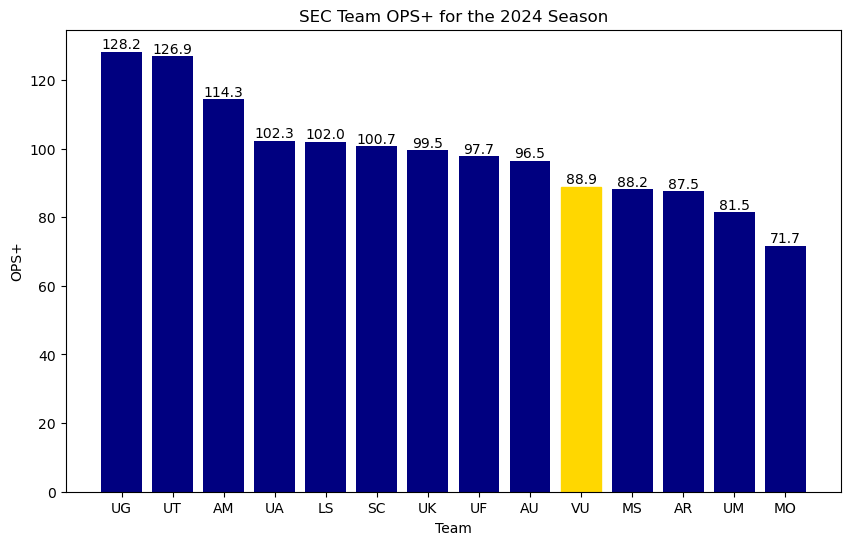

In [413]:
df_team_batting = df_team_batting.sort_values(by = "ops+", ascending = False)
plt.figure(figsize=(10, 6))
bars = plt.bar(df_team_batting['Team'], df_team_batting['ops+'], color='navy')
for bar, team in zip(bars, df_team_batting['Team']):
    if team == "VU":
        bar.set_color('gold')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.005, round(yval, 3), ha='center', va='bottom')

plt.xlabel('Team')
plt.ylabel('OPS+')
plt.title('SEC Team OPS+ for the 2024 Season')
plt.show()

This graph displays the OPS+ values for each SEC baseball team, with Vanderbilt being highlighted. Since 100 is always average, an OPS+ of below 100 is, by definition, below league average. Vanderbilt's team OPS+ rounds to 89, which means that Vanderbilt's batting was 11% less effective than the average SEC offense.

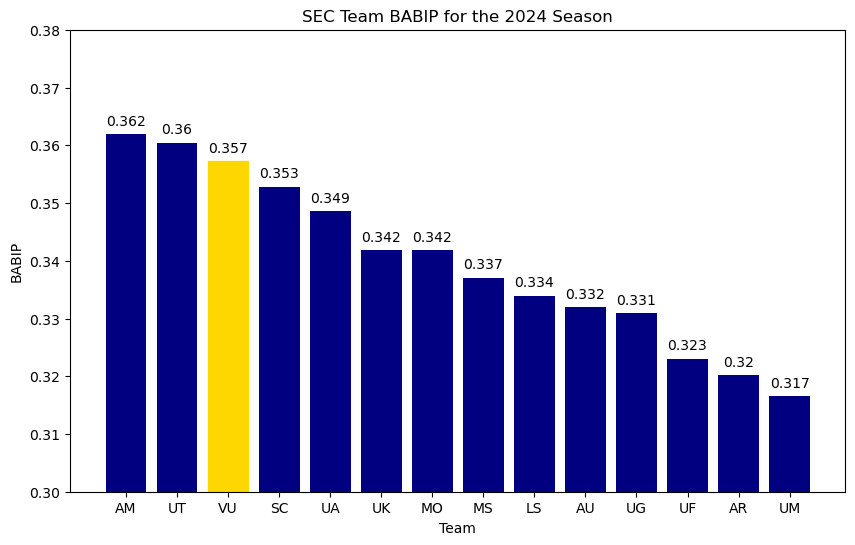

In [414]:
df_team_batting = df_team_batting.sort_values(by = "babip", ascending = False)
plt.figure(figsize=(10, 6))
bars = plt.bar(df_team_batting['Team'], df_team_batting['babip'], color='navy')
for bar, team in zip(bars, df_team_batting['Team']):
    if team == "VU":
        bar.set_color('gold')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.001, round(yval, 3), ha='center', va='bottom')
plt.ylim(.3)
plt.xlabel('Team')
plt.ylabel('BABIP')
plt.title('SEC Team BABIP for the 2024 Season')
plt.show()

This graph looks at batting average on balls in play (BABIP) for each SEC team in the 2024 season. BABIP is the main factor when measuring luck in batting production; a higher team BABIP means the team was overall luckier. Vanderbilt's BABIP of .357 ranks third in the SEC, which indicates that, despite their below average OPS+, Vanderbilt's batting performed better than expected. This means that their expected batting production is near the bottom of the SEC, which does not bode well for next season.

Text(0.5, 1.0, '2024 SEC Team Stolen Bases vs. Stolen Base Efficiency')

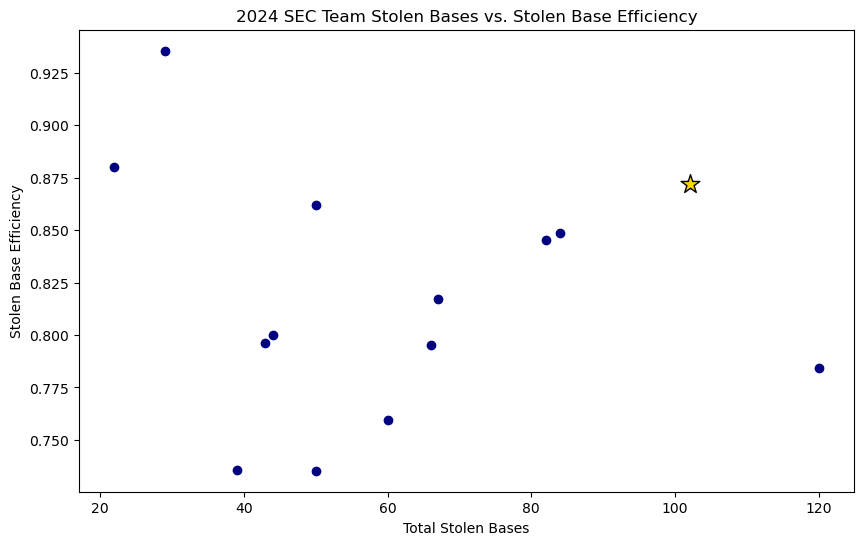

In [415]:
plt.figure(figsize=(10, 6))
plt.scatter(df_team_batting['sb'], df_team_batting['sbpct'], color='navy')
for i, row in df_team_batting.iterrows():
    if row['Team'] == "VU":
        plt.scatter(row['sb'], row['sbpct'], marker = "*", color='gold', edgecolors='black', s=200)
plt.xlabel('Total Stolen Bases')
plt.ylabel('Stolen Base Efficiency')
plt.title('2024 SEC Team Stolen Bases vs. Stolen Base Efficiency')

However, batting is not the only component of offense; another vital component is baserunning. The scatterplot above looks at total stolen bases against stolen base efficiency (stolen bases per attempt). If a team is in the top right of this graph, this means that they are both aggressive and efficient base stealers. The star on the scatterplot represents Vanderbilt's stolen base prowess, showing that, despite their below-average batting, they make up for it by having some of the best baserunners in the SEC.

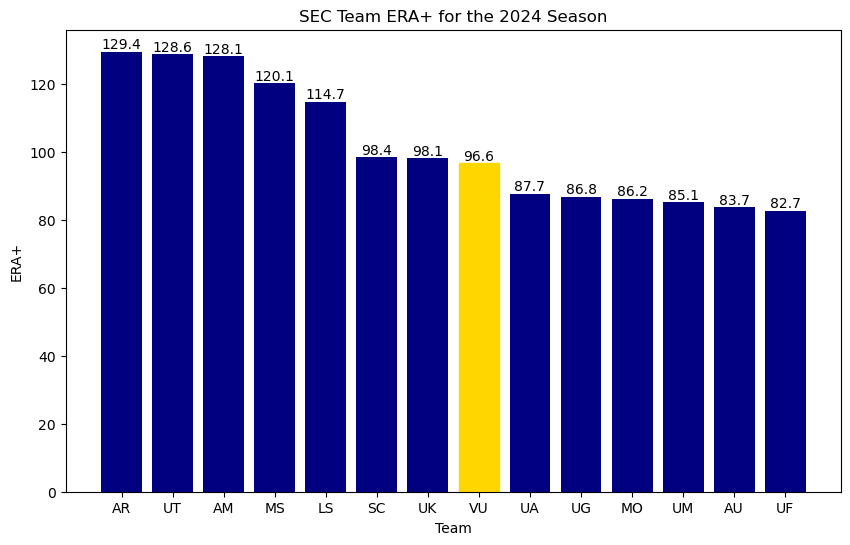

In [416]:
df_team_pitching = df_team_pitching.sort_values(by = "era+", ascending = False)
plt.figure(figsize=(10, 6))
bars = plt.bar(df_team_pitching['Team'], df_team_pitching['era+'], color='navy')
for bar, team in zip(bars, df_team_pitching['Team']):
    if team == "VU":
        bar.set_color('gold')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.005, round(yval, 3), ha='center', va='bottom')

plt.xlabel('Team')
plt.ylabel('ERA+')
plt.title('SEC Team ERA+ for the 2024 Season')
plt.show()

ERA+ works similar to OPS+ such that 100 is always average, and a higher value is better. The graph above looks at each team's ERA+ in descending order, with Vanderbilt's bar highlighted. At 96.6, Vanderbilt's ERA+ is slightly below average, but better than their OPS+ value.

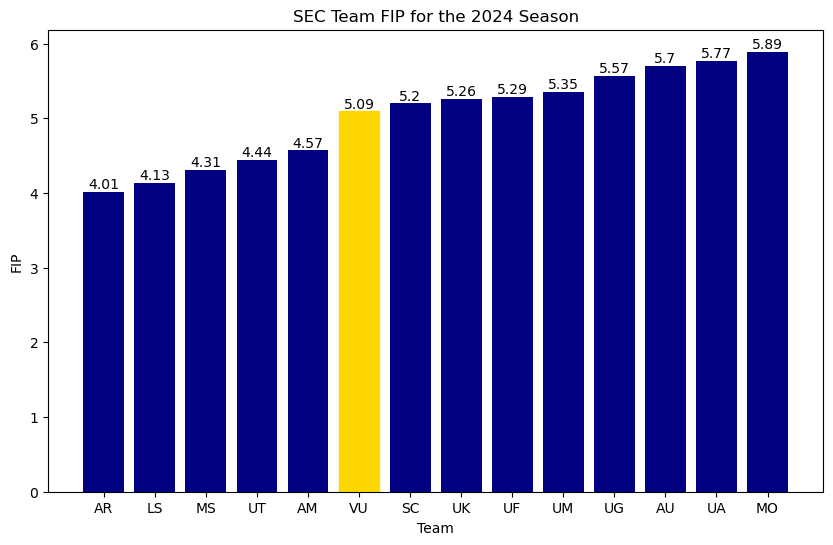

In [418]:
df_team_pitching = df_team_pitching.sort_values(by = "fip", ascending = True)
plt.figure(figsize=(10, 6))
bars = plt.bar(df_team_pitching['Team'], df_team_pitching['fip'], color='navy')
for bar, team in zip(bars, df_team_pitching['Team']):
    if team == "VU":
        bar.set_color('gold')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.005, round(yval, 3), ha='center', va='bottom')

plt.xlabel('Team')
plt.ylabel('FIP')
plt.title('SEC Team FIP for the 2024 Season')
plt.show()

Much like BABIP is a factor in quantifying luck in offensive production, fielding-independent pitching (FIP) is used for a similar purpose. However, while BABIP is a more luck-based statistic, FIP attempts to predict a player's (or team's) ERA by removing fielding, which makes up most of all pitching luck, from the equation. If a team has a high ERA but a low FIP, this means that the team performed worse than expected, indicating a degree of bad luck, and vice versa for a low ERA and high FIP. Vanderbilt's team ERA in 2024 was 5.183, while their team FIP was 5.094. This might not seem like much of a difference, but this is because these numbers are based on team statistics for an entire season, so the sample size is very large, meaning the variance between ERA and FIP is naturally small. Since Vanderbilt's FIP is lower than their ERA, one can conclude that Vanderbilt's pitching staff got relatively unlucky last season, and their ERA will go down (lower is better) next season.

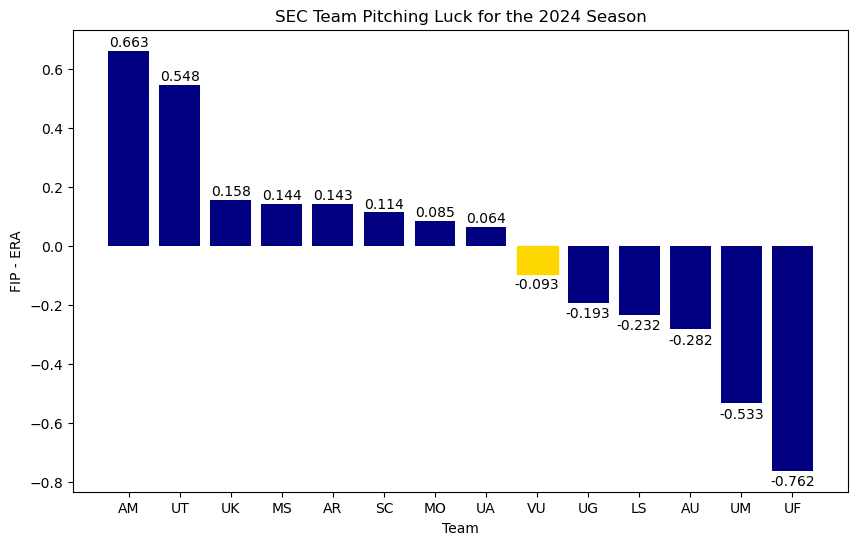

In [419]:
df_team_pitching["luck"] = df_team_pitching["fip"] - df_team_pitching["era"]
df_team_pitching = df_team_pitching.sort_values(by = "luck", ascending = False)
plt.figure(figsize=(10, 6))
bars = plt.bar(df_team_pitching['Team'], df_team_pitching['luck'], color='navy')
for bar, team in zip(bars, df_team_pitching['Team']):
    if team == "VU":
        bar.set_color('gold')
for bar in bars:
    yval = bar.get_height()
    if yval < 0:
        plt.text(bar.get_x() + bar.get_width() / 2, yval - 0.06, round(yval, 3), ha='center', va='bottom')
    else:
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.005, round(yval, 3), ha='center', va='bottom')

plt.xlabel('Team')
plt.ylabel('FIP - ERA')
plt.title('SEC Team Pitching Luck for the 2024 Season')
plt.show()

The code above subtracts ERA from FIP to create a new statistic that measures pitching luck. A positive value means a team's pitching staff performed better than expected, while a negative value means their pitching performed worse than expected. While Vanderbilt's pitching luck value is negative, indicating bad luck throughout the season, it does not seem like significantly bad luck; Vanderbilt's ERA and FIP were third closest to each other out of 12 SEC teams. Compare this to Florida's luck score, which is a staggering -.759; this means that Florida's ERA was about 76 points higher than their FIP. This is equivalent to a 1-run swing 3 out of every 4 games, as opposed to Vanderbilt's mere 1-run swing once every 11 games.

## Section 7: Create Visualizations (Individual Stats)

### Section 7.1: Individual Batting

In [420]:
df_batting_qual = df_batting[df_batting["pa"] > 164]

In [421]:
len(df_batting_qual)

107

There are 107 qualified batters in the SEC.

In [422]:
df_batting_qual

,Player,avg,ab,r,h,2b,3b,hr,rbi,tb,slg%,bb,hbp,so,gdp,ob%,sf,sh,Team,gp,gs,sb,sba,pa,ops,ops+,babip,sbpct
0,Christian Moore,0.375,296,83,111,19,2,34,74,236,0.797,38,3,49,5,0.451,0,0,UT,72,72,5,9,337,1.248,174.692582,0.361502,0.555556
1,Blake Burke,0.379,285,74,108,30,1,20,61,200,0.702,35,2,48,3,0.449,1,0,UT,72,72,11,13,323,1.151,155.064961,0.407407,0.846154
2,Gavin Grahovac,0.298,285,83,85,16,0,23,66,170,0.596,36,7,95,3,0.390,0,0,AM,67,67,4,5,328,0.986,118.780131,0.371257,0.800000
3,Tommy White,0.330,279,61,92,12,1,24,70,178,0.638,27,7,38,10,0.401,1,0,LS,66,66,3,3,314,1.039,130.020843,0.314815,1.000000
4,Slate Alford,0.300,267,55,80,13,0,17,69,144,0.539,26,5,63,8,0.370,2,0,UG,60,60,1,1,300,0.909,102.239831,0.340541,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,Paul Toetz,0.348,138,30,48,10,1,5,23,75,0.543,19,7,32,7,0.448,1,0,UG,48,36,4,4,165,0.991,122.809321,0.430000,1.000000
104,Cal Stark,0.212,137,35,29,6,1,11,30,70,0.511,19,11,59,1,0.353,0,2,UT,53,46,1,2,169,0.864,92.296588,0.268657,0.500000
106,Dylan Brewer,0.287,136,33,39,4,1,6,24,63,0.463,22,3,28,1,0.395,1,5,SC,44,38,12,14,167,0.858,93.277902,0.326733,0.857143
107,Will Tippett,0.180,133,29,24,3,0,7,24,48,0.361,26,6,63,1,0.335,2,11,SC,48,42,13,14,178,0.696,57.544770,0.278689,0.928571


Text(0.5, 1.0, 'Top 40 Players in OPS')

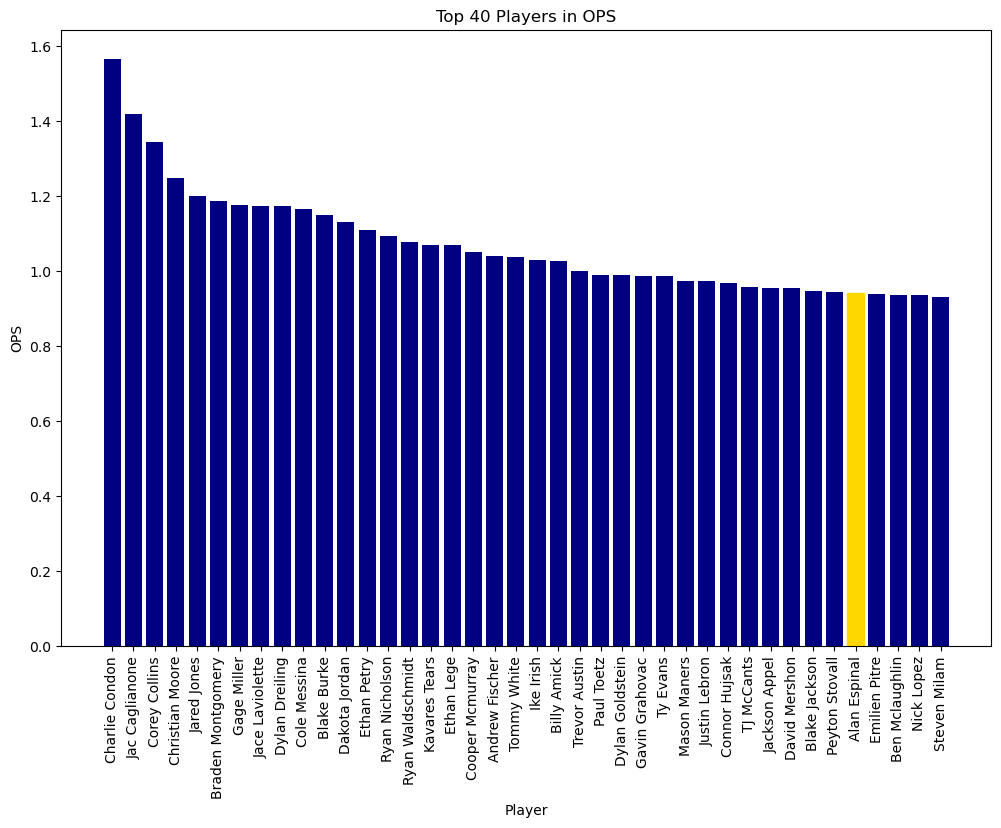

In [423]:
top40_ops = df_batting_qual.sort_values(by = "ops", ascending = False).head(40)
plt.figure(figsize=(12, 8))
bars = plt.bar(top40_ops['Player'], top40_ops['ops'], color='navy')
for bar, team in zip(bars, top40_ops['Team']):
    if team == "VU":
        bar.set_color('gold')
plt.xticks(rotation=90)
plt.xlabel('Player')
plt.ylabel('OPS')
plt.title('Top 40 Players in OPS')

This graph shows the top 40 qualified SEC batters in OPS, with Vanderbilt players highlighted in gold. The highest-ranked Vanderbilt batter in OPS, Alan Espinal, is ranked 36th out of 107 qualified players. For a team's top hitter, this is very low; lack of starpower in the lineup is part of the reason why Vanderbilt's team OPS+ is below average.

Text(0.5, 1.0, 'Top 20 Players in BABIP')

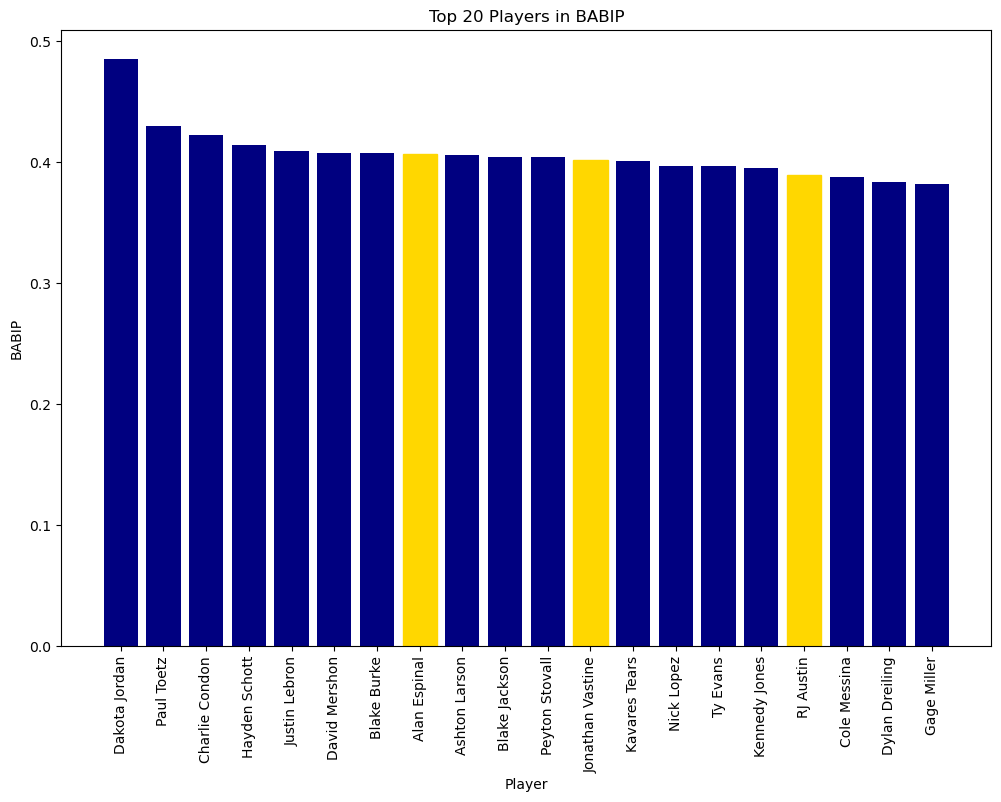

In [424]:
top20_babip = df_batting_qual.sort_values(by = "babip", ascending = False).head(20)
plt.figure(figsize=(12, 8))
bars = plt.bar(top20_babip['Player'], top20_babip['babip'], color='navy')
for bar, team in zip(bars, top20_babip['Team']):
    if team == "VU":
        bar.set_color('gold')
plt.xticks(rotation=90)
plt.xlabel('Player')
plt.ylabel('BABIP')
plt.title('Top 20 Players in BABIP')

As shown in the team BABIP bar graph, Vanderbilt's BABIP ranks 3rd of 12 SEC teams, which suggests that Vanderbilt may have some players with high BABIP values. Sure enough, Vanderbilt has 3 players in the SEC top 20 in BABIP, compared to only 1 player in the top 50 in OPS. However, this does not mean that these players are statistically fraudulent. Having a high BABIP indicates some degree of luck, but it also indicates a proficient ability to hit for contact. This suggests that Vanderbilt has an abundance of contact-oriented hitters, so it is no surprise that the three players highlighted above take up the first three spots in the lineup for most of their games. Besides, the following graph will further demonstrate two (Vastine and Austin) of these players' value, as well as some names some people might not expect.

Text(0.5, 1.0, 'Top 20 Players in SB')

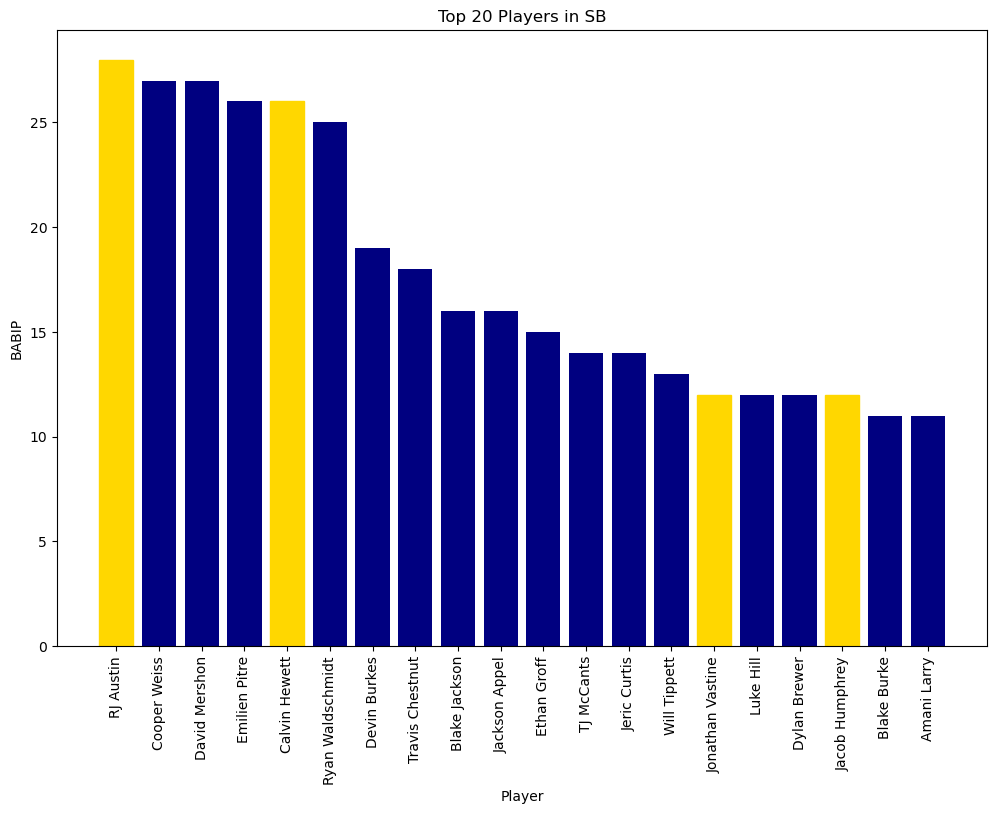

In [425]:
top20_sb = df_batting.sort_values(by = "sb", ascending = False).head(20)
plt.figure(figsize=(12, 8))
bars = plt.bar(top20_sb['Player'], top20_sb['sb'], color='navy')
for bar, team in zip(bars, top20_sb['Team']):
    if team == "VU":
        bar.set_color('gold')
plt.xticks(rotation=90)
plt.xlabel('Player')
plt.ylabel('BABIP')
plt.title('Top 20 Players in SB')

The graph above shows the top 20 SEC players in stolen bases, with Vanderbilt players highlighted in gold. There are 4 Vanderbilt players in the top 20 in stolen bases, which makes sense considering the scatterplot with team stolen base efficiency shows that Vanderbilt, as a team, has the 2nd most stolen bases. RJ Austin and Jonathan Vastine, the players highlighted in the BABIP graph, are present in this graph, with Austin having the most stolen bases in the SEC. The other 2 Vanderbilt players, Calvin Hewett and Jacob Humphrey, are unique in the sense that they do not meet the batting qualifications (at least 164 plate appearances) to show up in the OPS or BABIP graphs. This means that these players have very specialized jobs on the team as pinch runners and defensive substitutions; hitting is not these players' top priority on the team.

Text(0.5, 1.0, 'Top 20 Players in SB (<163 PA)')

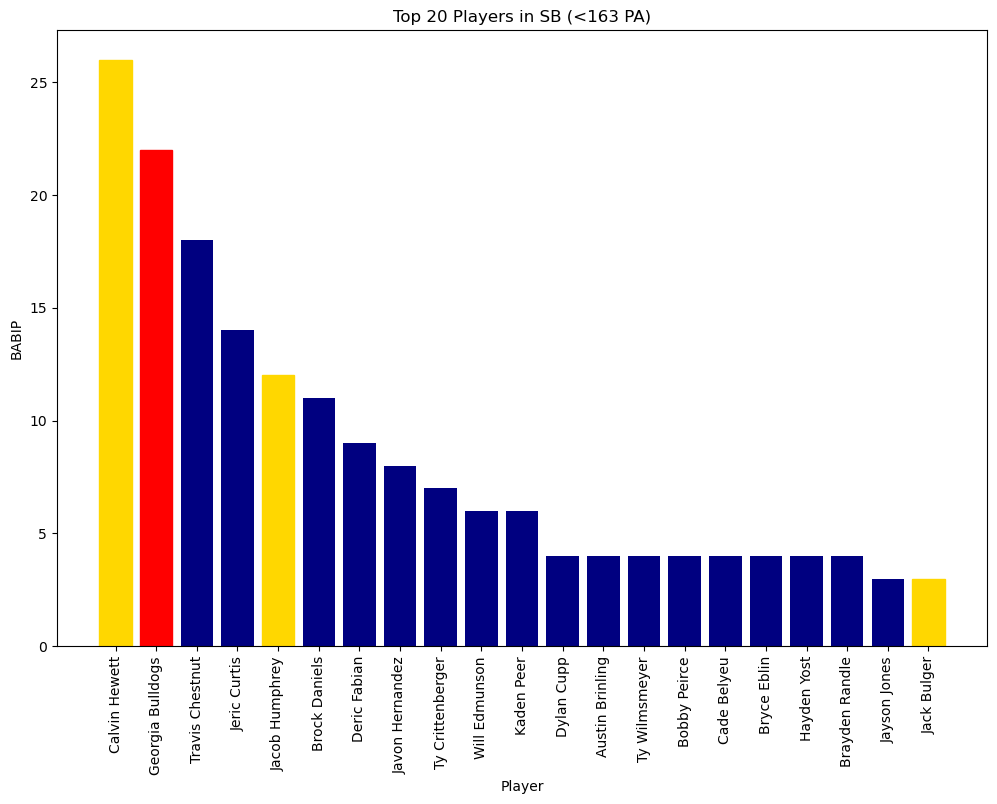

In [426]:
df_batting_nq = df_batting[df_batting["pa"] <= 164]
top_20_players = df_batting_nq.sort_values(by='sb', ascending=False).head(20)
team_total_sb = df_batting.groupby('Team')['sb'].sum().reset_index()
team_to_add = 'UG'
team_total = team_total_sb[team_total_sb['Team'] == team_to_add]['sb'].values[0]
team_total_row = pd.DataFrame({
    'Player': ["Georgia Bulldogs"],
    'Team': [team_to_add],
    'sb': [team_total]
})
top20_sb = pd.concat([top_20_players, team_total_row]).sort_values(by='sb', ascending=False)
plt.figure(figsize=(12, 8))
bars = plt.bar(top20_sb['Player'], top20_sb['sb'], color='navy')
for bar, team in zip(bars, top20_sb['Team']):
    if team == "VU":
        bar.set_color('gold')
for bar, player in zip(bars, top20_sb['Player']):
    if player == "Georgia Bulldogs":
        bar.set_color('red')
plt.xticks(rotation=90)
plt.xlabel('Player')
plt.ylabel('BABIP')
plt.title('Top 20 Players in SB (<163 PA)')

When filtering to only include unqualified hitters, Calvin Hewett has the most stolen bases in the SEC. He is also the only unqualified hitter with more stolen bases than an entire team; Hewett's 26 stolen bases beats Georgia's team total of 22.

### Section 7.2: Individual Pitching

In [427]:
df_pitching_qual = df_pitching[df_pitching["ip"] >= 53]

In [428]:
len(df_pitching_qual)

42

There are 42 qualified pitchers in the SEC.

Text(0.5, 1.0, 'Top Players in ERA (Minimum 53 IP)')

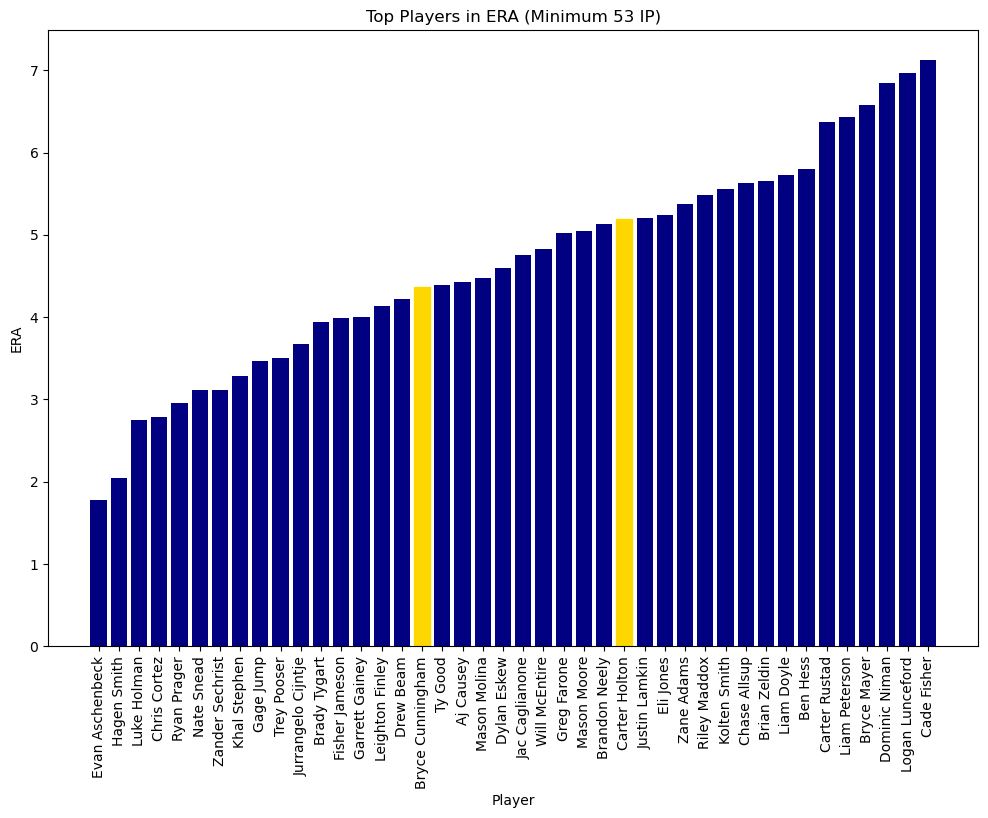

In [429]:
top42_era = df_pitching_qual.sort_values(by = "era", ascending = True)
plt.figure(figsize=(12, 8))
bars = plt.bar(top42_era['Player'], top42_era['era'], color='navy')
for bar, team in zip(bars, top42_era['Team']):
    if team == "VU":
        bar.set_color('gold')
plt.xticks(rotation=90)
plt.xlabel('Player')
plt.ylabel('ERA')
plt.title('Top Players in ERA (Minimum 53 IP)')

When filtering the pitching data to only include qualified pitchers (at least 53 IP), only 2 of the 42 qualified pitchers played for Vanderbilt. This suggests that Vanderbilt's pitching is more dependent on their bullpen than their starting rotation. Neither of these pitchers really stand out as star players or liabilities, which is consistent with the team pitching statistics being average at everything.

In [430]:
def update_plot(min_innings, stat, ascending):
    filtered_df = df_pitching[df_pitching['ip'] >= min_innings].sort_values(by=stat, ascending = ascending).head(20)
    plt.figure(figsize=(12, 8))
    bars = plt.bar(filtered_df['Player'], filtered_df[stat], color='navy')
    for bar, team in zip(bars, filtered_df['Team']):
        if team == "VU":
            bar.set_color('gold')
    for bar in bars:
        yval = bar.get_height()
        if yval < 0:
            plt.text(bar.get_x() + bar.get_width() / 2, yval - 0.08, round(yval, 3), ha='center', va='bottom')
        else:
            plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.005, round(yval, 3), ha='center', va='bottom')
    plt.xticks(rotation=90)
    plt.xlabel('Player')
    plt.ylabel('ERA')
    plt.title(f'Top Players in {stat}')
    plt.show()
min_innings_slider = IntSlider(value=53, min=0, max=100, step=1, description='Min Innings:')
interact(update_plot, min_innings=min_innings_slider, stat="era", ascending = True)

interactive(children=(IntSlider(value=53, description='Min Innings:'), Text(value='era', description='stat'), …

<function __main__.update_plot(min_innings, stat, ascending)>

This graph has an interactive slider that changes the minimum number of innings to appear on the graph. Setting the slider to 31 will make Vanderbilt's best reliever in ERA, Miller Green, appear on the graph at number 15. This is the highest position any Vanderbilt pitcher appears on the interactive graph, so one could say that Green's ERA of 3.16 is more impressive than any of Vanderbilt's starters' ERAs.

In [431]:
interact(update_plot, min_innings=min_innings_slider, stat="fip", ascending = True)

interactive(children=(IntSlider(value=53, description='Min Innings:'), Text(value='fip', description='stat'), …

<function __main__.update_plot(min_innings, stat, ascending)>

When sorting by FIP and setting the slider to at least 52 innings, JD Thompson appears 6th of all players in FIP. This is impressive considering the highest he appears in the ERA graph is 16th; this indicates that Thompson underperformed last season and should improve next season. However, last season, he was ejected for using a foreign substance, so it may not be wise to trust his performance last season. Perhaps a more trustworthy performance is Carter Holton's FIP of 4.23, which compares favorably to his ERA of 5.19.

In [432]:
df_pitching["luck"] = df_pitching["fip"] - df_pitching["era"]
interact(update_plot, min_innings=min_innings_slider, stat="luck", ascending = False)

interactive(children=(IntSlider(value=53, description='Min Innings:'), Text(value='luck', description='stat'),…

<function __main__.update_plot(min_innings, stat, ascending)>

This interactive graph looks at individual pitchers' difference in FIP and ERA. When filtering to only include qualified pitchers, Carter Holton ranks as the 7th most unlucky pitcher in terms of FIP and ERA difference, which indicates that Holton will improve next season. The highest any Vanderbilt pitcher ranks in this category is Alex Kranzler at 6th (minimum innings: 19); this means that Kranzler was the most lucky pitcher on the team last season. The most unlucky pitcher on the team last season was, without a doubt, Sam Hliboki (minimum innings: 23), with a monstrous difference of -4.08. This means that, for every 9 innings Hliboki pitches, he gives up about 4 more runs than expected; over the course of an entire season, this adds up quickly. However, since Hliboki was a 5th year player last season, he will not return for another season in college, but if he continues his baseball career, whichever team who signs him will be thoroughly impressed.

In [438]:
interact(update_plot, min_innings=min_innings_slider, stat="k/9", ascending = False)

interactive(children=(IntSlider(value=47, description='Min Innings:'), Text(value='k/9', description='stat'), …

<function __main__.update_plot(min_innings, stat, ascending)>

Carter Holton ranks 6th in the SEC in strikeouts per 9 innings (K/9). This is part of the reason he has such a low FIP compared to his ERA, as the formula for FIP rewards pitchers who get a lot of strikeouts.

In [440]:
interact(update_plot, min_innings=min_innings_slider, stat="bb/9", ascending = True)

interactive(children=(IntSlider(value=53, description='Min Innings:'), Text(value='bb/9', description='stat'),…

<function __main__.update_plot(min_innings, stat, ascending)>

Out of all SEC pitchers with at least 48 IP, Devin Futrell has the 7th lowest rate of walks allowed.

In [442]:
interact(update_plot, min_innings=min_innings_slider, stat="hr/9", ascending = True)

interactive(children=(IntSlider(value=1, description='Min Innings:'), Text(value='hr/9', description='stat'), …

<function __main__.update_plot(min_innings, stat, ascending)>

Out of all SEC pitchers with at least 52 IP, JD Thompson has the 6th lowest rate of home runs allowed. This is part of the reason his FIP is so low compared to his ERA.